In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import t
from scipy.stats import multivariate_normal
import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF, Product
from sklearn.model_selection import train_test_split

import seaborn as sns

## Task 1 (Getting to know Gaussian processes)

Try to understand the following code. Experiment with adding noise to the y data or adding data points or removing data points or different functions of the independent variables. Try also some different kernels (see the imports) and hyperparameters (A visual comparison should give you enough intuition, you will do some additional tests later on).

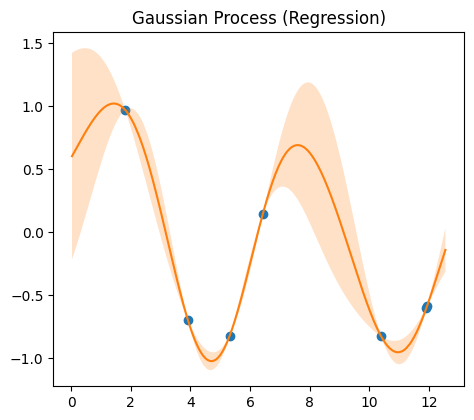

In [6]:
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 

# Create kernel and define Gaussian Process Regressor (GPR)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression)")
plt.show()

## Task 2 (Gaussian Process Priors)

**Task:** 
When we initialize the `GaussianProcessRegressor` with some chosen kernel functions (i.e. before fitting it to the available data), we have the opportunity to study the kernel functions directly. For this reason search for a list of implemented kernels in the sklearn documentation.

**Task:** Visualize some (at least 3) of the kernel functions you found in the documentation for several hyperparameter combinations. You can also experiment with self defined kernels by suitably combining kernel functions as explained in the lecture with the functions provided by sklearn. For the visualization make sure that every plot is sufficiently labeled.

*Hint: The commands `fit` and `sample_y` on the GPR object are important for this task.*

#### With ExpSineSquared kernel

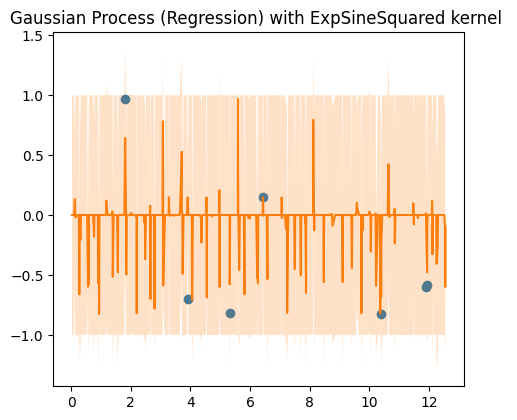

In [15]:
from sklearn.gaussian_process.kernels import ExpSineSquared
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 
# Create kernel and define Gaussian Process Regressor (GPR)
kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) ##This example fits a Gaussian process with an ExpSineSquared kernel to some data. 
## The kernel has an amplitude of 1.0 and a period of 5.0. The bounds on the periodicity are set to (1e-2, 1e1) to ensure that the period is within a reasonable range.
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) with ExpSineSquared kernel ")
plt.show()

### With Pairwise Kernel

**Exaplanation:**
This kernel function algorithms that operate on pairs of data points, such as the Gaussian process regression

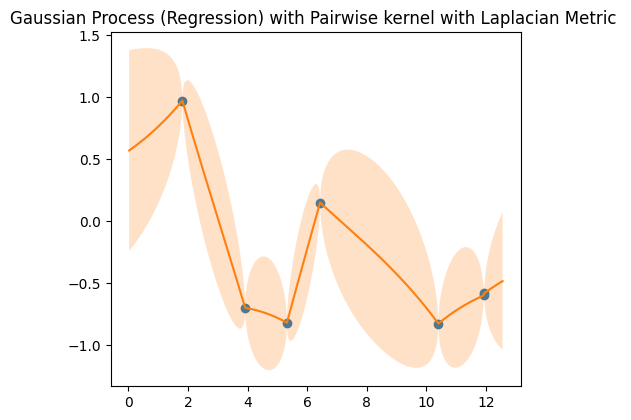

In [41]:
from sklearn.gaussian_process.kernels import PairwiseKernel
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 
# define the kernel
kernel = PairwiseKernel(metric="laplacian")     
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) with Pairwise kernel with Laplacian Metric ")
plt.show()

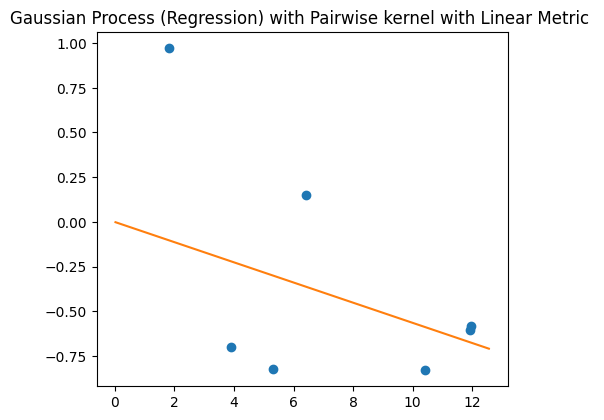

In [46]:
from sklearn.gaussian_process.kernels import PairwiseKernel
# Generating some data
n_samples = 7
random_state = 1

rng = np.random.default_rng(random_state)
data_x = rng.uniform(size=n_samples)

data_x = 4 * np.pi * data_x 
data_y = np.sin(data_x) 
# define the kernel
kernel = PairwiseKernel(metric='linear')     
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(data_x.reshape(-1,1), data_y)

# Create test data
x_test = np.sort(4*np.pi*rng.uniform(size=1000))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test.reshape(-1,1), return_std=True)

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(5.3, 4.6), sharey=False)

# Plot the training data
ax.scatter(data_x, data_y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, c='tab:orange')

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma

ax.fill_between(x_test, lower, upper, alpha=0.23)

plt.title("Gaussian Process (Regression) with Pairwise kernel with Linear Metric ")
plt.show()

## Task 3 (Gaussian Process Regression)

**Task:** Create some synthetic data with noise (or alternatively find some data that interests you e.g. on kaggle). Afterwards split the data into training and validation data employing the `train_test_split` function (look at the imports for detail). Visualize the data.

In [47]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

# generate some random data to fit
X = np.random.rand(100, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

**Task:** Fit a GPR model to your data for fixed hyperparameters (sklearn automatically performs hyperparameter tuning so make sure to turn it off).

In [48]:
# define the kernel
kernel = RBF(length_scale=1.0)

# create the Gaussian process regressor with fixed hyperparameters
gp = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10,
    optimizer=None
)

# fit the model on the training data
gp.fit(X_train, y_train)

# make predictions on the validation data
y_pred = gp.predict(X_val)

**Task:** Determine the log-marginal-likelihood for your fixed parameters in the fitted model. Visualize how well your models fit the data.

In [49]:

# determine the log-marginal-likelihood
log_likelihood = gp.log_marginal_likelihood()
print("Log-marginal-likelihood:", log_likelihood)


Log-marginal-likelihood: -3264474679.391734


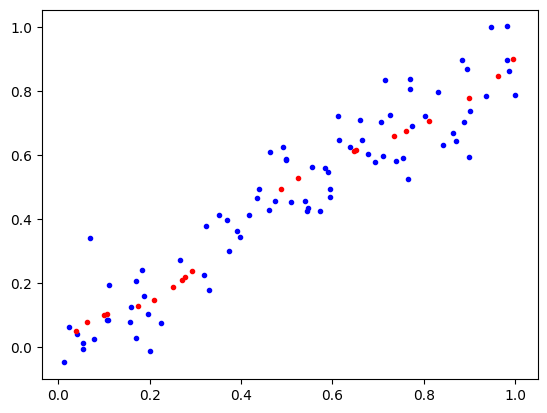

In [50]:
# plot the results
plt.plot(X_train, y_train, "b.")
plt.plot(X_val, y_pred, "r.")
plt.show()